# Brazilian cities to travel

<b> Goal: </b> This portfolio project showcases my expertise in data analysis through answering the question: "Which Brazilian cities should I travel to?". This is done by an in-depth examination of Brazilian cities identified by the Brazilian Ministry of Tourism as key destinations in their public policy plan (Mapa do Turismo/Tourism Map)

In [147]:
## adicionar índice [[indice]]

## Introduction: Where to travel to?

While every destination offers unique experiences, not all locations cater equally to tourists. When thinking
where to travel, the first factor that comes to mind finding accommodation and delicious food. Especially when traveling without family connections, prioritizing logistical infrastructure becomes crucial. <br>

Therefore, my initial analysis utilizes a Tourism Map as a primary tool. This map prioritizes taking into account the performance of the tourism sector, ensuring the availability of essential amenities and services. While Brazil contains over 5,500 municipalities, the Ministry of Tourism focuses on roughly 2,600 cities within designated tourist regions, which ensures a baseline level of tourist infrastructure.

## Descriptive Analysis

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [149]:
df = pd.read_excel(r"data\2019_MTur_Categorization.xlsx", header = 3)

df.head()

,UF,Município,Região Turística,Domésticos,Internacionais,Estabelecimentos,Empregos,Arrecadação de Impostos,Categoria,Código Município
0,MG,Abaeté,Lago de Três Marias,245,8415,3,16,0,D,3100203.0
1,PA,Abaetetuba,Região Turística do Tocantins,181,29939,5,12,0,D,1500107.0
2,BA,Abaíra,Chapada Diamantina,0,0,2,5,0,D,2900108.0
3,SC,Abdon Batista,Vale dos Imigrantes,0,0,0,0,0,E,4200051.0
4,SC,Abelardo Luz,Grande Oeste,0,10515,4,14,0,D,4200101.0


In [150]:
#renaming columns to english
df.rename({'UF': 'State', 
           'Município': 'City', 
           'Região Turística': 'Tourist Region', 
           'Domésticos': 'Domestic Tourists', 
           'Internacionais': 'International Tourists',
           'Estabelecimentos': 'Establishments', #Quantity of establishments related to tourism
           'Empregos':'Jobs', #Quantity of jobs related to tourism
           'Arrecadação de Impostos': 'Tax Revenue', 
           'Categoria':'Category',
           'Código Município':'City Code'}, axis='columns', inplace=True)

In [151]:
#showcasing data types and non-null cells in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2621 non-null   object 
 1   City                    2621 non-null   object 
 2   Tourist Region          2621 non-null   object 
 3   Domestic Tourists       2621 non-null   int64  
 4   International Tourists  2621 non-null   int64  
 5   Establishments          2621 non-null   int64  
 6   Jobs                    2621 non-null   int64  
 7   Tax Revenue             2621 non-null   int64  
 8   Category                2621 non-null   object 
 9   City Code               2619 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 204.9+ KB


All cells have information in them, there isn't a single null object in this dataset. With the information that we have so far, no conclusion can be made, but this description can be further explored in other data.

### 1. Distribution of Turistic States

In [152]:
#distribution of uf (States) in the 2019 dataset

#creating the pivot_table in which the pie chart will be based on
df_count_state = pd.pivot_table(data = df,
                             values = 'City',
                             index = 'State',
                             aggfunc='count').sort_values(by='City',ascending=False).reset_index()

df_count_state['% City per total Tourism Map'] = round((df_count_state['City']/df_count_state['City'].sum())*100,1)

df_count_state.head()

,State,City,% City per total Tourism Map
0,MG,587,22.4
1,RS,385,14.7
2,SP,290,11.1
3,PR,175,6.7
4,SC,136,5.2


In [153]:
# comparing the distribution in the categorized dataset to that of all brazilian cities

df_city_br = pd.read_excel(r"data\BR_code_cities_states.xls", header = 6)

df_city_br.columns

Index(['Cod_UF', 'Nome_UF', 'Região Geográfica Intermediária',
       'Nome Região Geográfica Intermediária', 'Região Geográfica Imediata',
       'Nome Região Geográfica Imediata', 'Mesorregião Geográfica',
       'Nome_Mesorregião', 'Microrregião Geográfica', 'Nome_Microrregião',
       'Município', 'Código Município Completo', 'MUNICIPIO', 'UF'],
      dtype='object')

In [154]:
# making a pivot table of the total cities in Brazil 
#in order to compare the distribution of the total turist cities 

#first, renaming the columns that will be used

df_city_br.rename({'UF': 'State', 
                  'MUNICIPIO': 'City'}, axis='columns', inplace=True)

df_city_br_total = pd.pivot_table(data = df_city_br,
                             values = 'City',
                             index = 'State',
                             aggfunc='count').sort_values(by='City',ascending=False).reset_index()

df_city_br_total['% City per total in Brazil'] = round((df_city_br_total['City']/df_city_br_total['City'].sum())*100,1)

df_city_br_total.head()

,State,City,% City per total in Brazil
0,MG,853,15.3
1,SP,645,11.6
2,RS,497,8.9
3,BA,417,7.5
4,PR,399,7.2


In [155]:
#merging the first pivot table and the total
df_compare = pd.merge(df_count_state[['State','% City per total Tourism Map']],
                     df_city_br_total[['State','% City per total in Brazil']], 
                     how = "outer", 
                     on='State')

df_compare = df_compare.melt(id_vars='State',value_name='% Percentage',var_name = 'Proportion').rename(columns=str.title)

df_compare.head()

,State,Proportion,% Percentage
0,MG,% City per total Tourism Map,22.4
1,RS,% City per total Tourism Map,14.7
2,SP,% City per total Tourism Map,11.1
3,PR,% City per total Tourism Map,6.7
4,SC,% City per total Tourism Map,5.2


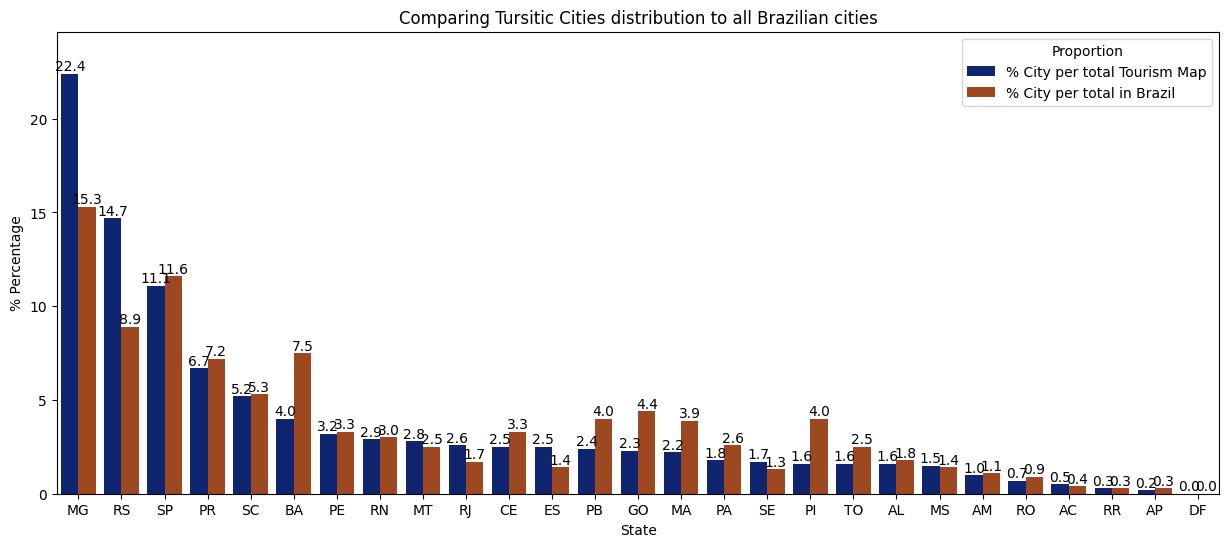

In [156]:
plt.figure(figsize=(15,6))
fig_states = sns.barplot(
            data=df_compare, 
            x="State", 
            y="% Percentage", 
            hue="Proportion",
            palette="dark"
)

fig_states.set_title("Comparing Tursitic Cities distribution to all Brazilian cities")
fig_states.margins(y=0.1) # make room for the labels
for bars in fig_states.containers:
   fig_states.bar_label(bars, fmt='%.1f')

Generally, <b> the distribution accompanies the general distribution of cities in Brazil as a whole</b>. Some notable exceptions are: RS (Rio Grande do Sul), BA (Bahia) and PI (Piauí). Therefore, we can conclude that there is not a significant misrepresentation of each reagion, even though the database is imbalanced.

### 2. Quantitative Measures

In [157]:
#seeing most numbers
df.describe()

,Domestic Tourists,International Tourists,Establishments,Jobs,Tax Revenue,City Code
count,2.621000e+03,2.621000e+03,2621.000000,2621.000000,2.621000e+03,2.619000e+03
mean,3.011899e+03,5.534732e+04,6.697062,82.580313,9.952682e+05,3.377033e+06
std,3.748660e+04,2.913402e+05,20.912444,487.521166,9.461004e+06,9.039361e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.100023e+06
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.908403e+06
50%,0.000000e+00,4.227000e+03,2.000000,5.000000,0.000000e+00,3.170479e+06
75%,3.120000e+02,2.448600e+04,5.000000,30.000000,0.000000e+00,4.205382e+06
max,1.651696e+06,7.119416e+06,431.000000,17946.000000,4.021993e+08,5.300108e+06


Looking at the numbers above, there are noteworthy trends that need to be discussed:
1) <b> ZEROS:</b> On most columns, the lower quartile is 0, what shows that a good chunk of the data is 0. To understand the distribution of these columns, let's create a histogram and a boxplot. This will reveal potential outliers, skew, and normality, which are crucial for further analysis. This information, accompanied to the fact that there isn't a single null in this dataset, turns us to the hypothesis that missing values were replaced with zeros. <br>
<br>
2) <b> MEAN versus MEDIAN:</b> A common way to infer the distribution of data is looking through the difference between the values of mean and median. In this dataset, there is a significant distance between both metrics, signalizing that there many outliers and internal groups that can be categorized. Therefore, it is important to analyze how the categories (column "Category") differ in each metric. <br>

#### 2.1 Zeros

[Text(0.5, 1.0, 'Establishments distribution in the database')]

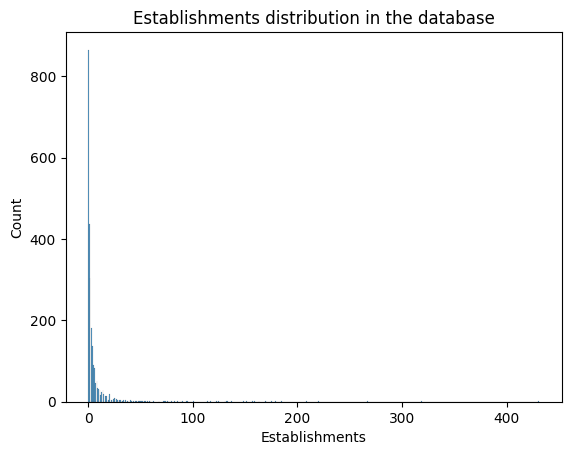

In [158]:
sns.histplot(data = df, 
             x='Establishments').set(title = "Establishments distribution in the database")

Analyzing the histogram above, there are a large number of variables with the number zero. Therefore, this must mean that what would be null/empty was replaced by 0. In order to make the analysis more accurate and clean the database, it is convenient to remove all quantitative columns with only number 0.

In [159]:
df0 = df.loc[(df[['Jobs',
           'Establishments',
           'Domestic Tourists', 
           'International Tourists']] == 0).all(axis=1)]

df0.head()

,State,City,Tourist Region,Domestic Tourists,International Tourists,Establishments,Jobs,Tax Revenue,Category,City Code
3,SC,Abdon Batista,Vale dos Imigrantes,0,0,0,0,0,E,4200051.0
6,MG,Acaiaca,Serras de Minas,0,0,0,0,0,E,3100401.0
10,PI,Acauã,Polo Histórico Cultural,0,0,0,0,0,E,2200053.0
19,SC,Agrolândia,Caminhos do Alto Vale,0,0,0,0,0,D,4200200.0
20,SC,Agronômica,Caminhos do Alto Vale,0,0,0,0,0,E,4200309.0


Before proceeding with further analysis, let's explore this dataset to understand the variables that would be removed

In [160]:
#dividing by categories 
pd.pivot_table(data = df0,
               values = 'City',
               index = 'Category',
               aggfunc='count').sort_values(by='Category',ascending=False).reset_index()

,Category,City
0,E,426
1,D,78


In [161]:
#calculating how many rows would be dropped
len(df0)/len(df)

0.192293017932087

Around 19% of the original dataset would be dropped if we were to delete all rows with zeros.Upon further analysis, this pattern persists across all historical datasets, suggesting that these zeros are intentional and hold meaning within the context of the data. It is also worth pointing out that all rows contain cities categorized as D and E, which are expected to have lower values. It requires further analysis to understand how to treat these categories.

An important side question that arises from this analysis is: If all rows have the same values in all variables, why some are categorized as D and others E? 

#### 2.2 Category Variation

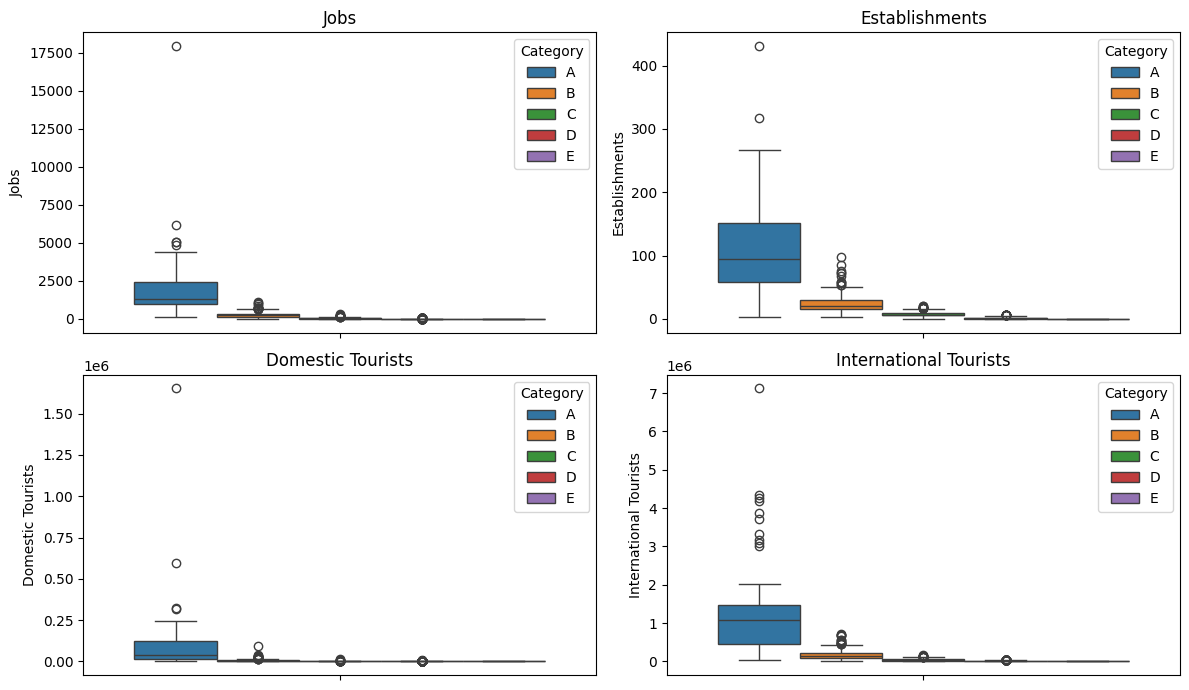

In [162]:
#creatingg multiple boxplots in order to understand the distribution of zeros in each column
fig, ax = plt.subplots(2,2, figsize = (12,7))

#selecting columns
columns = ['Jobs',
           'Establishments',
           'Domestic Tourists', 
           'International Tourists']

#making a for loop to create each dataviz 
col = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data = df.sort_values(by=['Category']), 
                    y = columns[col], 
                    hue="Category", #making the hue by Category
                    ax = ax[i,j]) 
        ax[i,j].set_title(f"{columns[col]}")
        col+=1
plt.tight_layout()


análise do boxplot:
- Os boxplots são bem condizentes com a categorização, não tem nenhum boxplot que sai do esperado das categorias.
- Muitos outliers na categoria A e B
- Pouca coisa nas categorias D e E => Explorar mais

## 2.21 Categories D and E

In [163]:
#selecting only categories D & E for analysis
df_de = df.loc[(df['Category'] == 'D') | (df['Category'] == 'E')]

df_de.head()

,State,City,Tourist Region,Domestic Tourists,International Tourists,Establishments,Jobs,Tax Revenue,Category,City Code
0,MG,Abaeté,Lago de Três Marias,245,8415,3,16,0,D,3100203.0
1,PA,Abaetetuba,Região Turística do Tocantins,181,29939,5,12,0,D,1500107.0
2,BA,Abaíra,Chapada Diamantina,0,0,2,5,0,D,2900108.0
3,SC,Abdon Batista,Vale dos Imigrantes,0,0,0,0,0,E,4200051.0
4,SC,Abelardo Luz,Grande Oeste,0,10515,4,14,0,D,4200101.0


In [164]:
df_de[df_de['Category'] == 'D'].describe()

,Domestic Tourists,International Tourists,Establishments,Jobs,Tax Revenue,City Code
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1.496000e+03
mean,144.138184,6885.518692,1.558745,7.668892,2748.592790,3.376684e+06
std,430.753717,9367.422890,1.480519,11.460477,36274.005348,8.955443e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.100031e+06
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.909806e+06
50%,0.000000,2591.000000,1.000000,3.000000,0.000000,3.165454e+06
75%,142.250000,10601.000000,2.000000,10.000000,0.000000,4.201752e+06
max,9305.000000,48799.000000,6.000000,92.000000,641273.000000,5.222005e+06


In [165]:
df_de[df_de['Category'] == 'E'].describe()

,Domestic Tourists,International Tourists,Establishments,Jobs,Tax Revenue,City Code
count,426.0,426.0,426.0,426.0,426.0,4.260000e+02
mean,0.0,0.0,0.0,0.0,0.0,3.418241e+06
std,0.0,0.0,0.0,0.0,0.0,8.235451e+05
min,0.0,0.0,0.0,0.0,0.0,1.100379e+06
25%,0.0,0.0,0.0,0.0,0.0,3.101936e+06
50%,0.0,0.0,0.0,0.0,0.0,3.165569e+06
75%,0.0,0.0,0.0,0.0,0.0,4.301871e+06
max,0.0,0.0,0.0,0.0,0.0,5.212303e+06


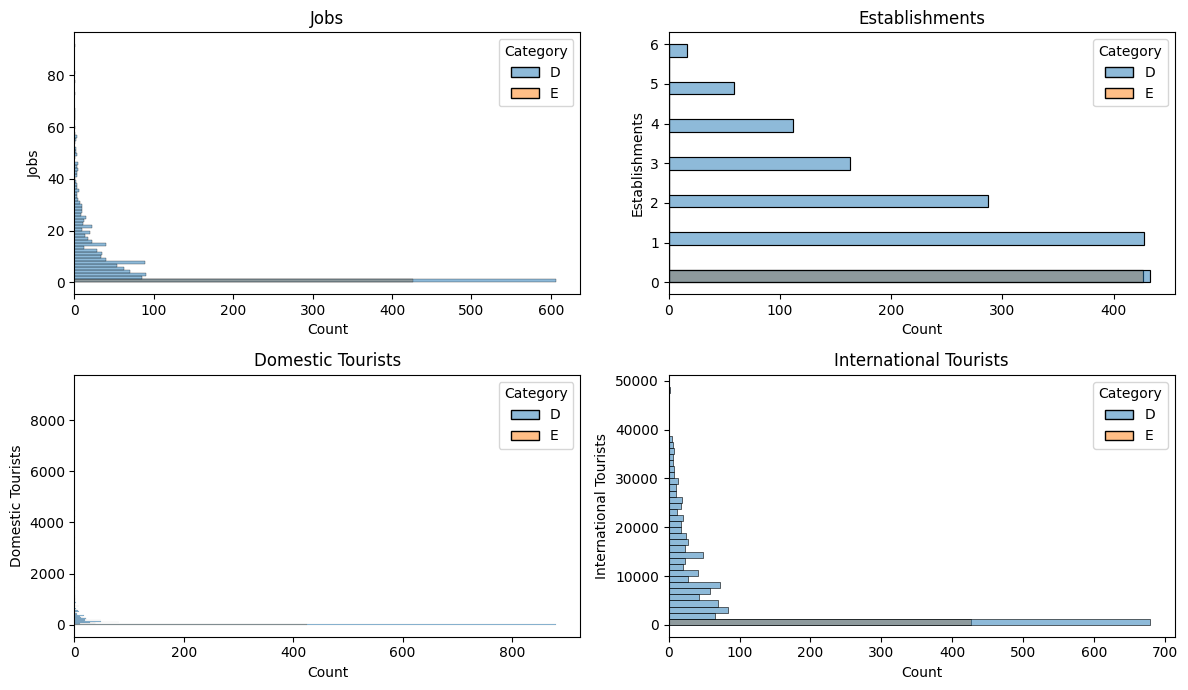

In [166]:
#creatingg multiple boxplots in order to understand the distribution of zeros in each column
fig, ax = plt.subplots(2,2, figsize = (12,7))

#selecting columns
columns = ['Jobs',
           'Establishments',
           'Domestic Tourists', 
           'International Tourists']

#making a for loop to create each dataviz 
col = 0
for i in range(2):
    for j in range(2):
        sns.histplot(data = df_de.sort_values(by=['Category']), 
                    y = columns[col], 
                    hue="Category", #making the hue by Category
                    ax = ax[i,j]) 
        ax[i,j].set_title(f"{columns[col]}")
        col+=1
plt.tight_layout()

In [167]:
#análise: 
#Na categoria D: tem alguns outliers de visitantes e trabalhadores, mas a quantidade de estabelecimentos 
#está bem distorcida. Isso pode significar que a fonte de dados está um pouco torta ou que a cidade realmente não é muito interessante.
#vale despriorizar essas cidades na hora de esoclher um destino.

#Na categoria E: quase todos os dados são 0, então provavelmente essas cidades não são muito interessantes para visitar. 
#Cabe deixar para análise histórica mais não pode ser cidades interessantes para visitar.

## Time series analysis

In [170]:
#importing the 2016 data and renaming columns
df_2016 = pd.read_csv(r"data\2016_MTur_Categorization.csv", delimiter=';')

df_2016.columns

Index(['MACRO', 'UF', 'REGIAO_TURISTICA', 'MUNICIPIO', 'CODIGO_MUNICIPIO',
       'QUANTIDADE_EMPREGOS', 'QUANTIDADE_ESTABELECIMENTOS',
       'QUANTIDADE_VISITAS_ESTIMADA_INTERNACIONAL',
       'QUANTIDADE_VISITAS_ESTIMADA_NACIONAL', 'CLUSTER'],
      dtype='object')

In [174]:
#renaming columns to english and making sure they match the 2019 version
df_2016.rename({'MACRO': 'Macro-Region', #the five official regions of Brazil based on shared characteristics, like climate or vegetation.
           'UF': 'State', 
           'MUNICIPIO': 'City', 
           'REGIAO_TURISTICA': 'Tourist Region', 
           'QUANTIDADE_VISITAS_ESTIMADA_NACIONAL': 'Domestic Tourists', 
           'QUANTIDADE_VISITAS_ESTIMADA_INTERNACIONAL': 'International Tourists',
           'QUANTIDADE_ESTABELECIMENTOS': 'Establishments', 
           'QUANTIDADE_EMPREGOS':'Jobs', 
           'CLUSTER':'Category',
           'CODIGO_MUNICIPIO':'City Code'}, axis='columns', inplace=True)

##tax revenue as a variable has been introduced in the 2019 analysis
df_2016.head()

,Macro-Region,State,Tourist Region,City,City Code,Jobs,Establishments,International Tourists,Domestic Tourists,Category
0,Nordeste,PI,NaN,São João da Varjota,2209955.0,0,0,0,0,E
1,Norte,PA,Amazônia Atlântica,Ipixuna do Pará,1503457.0,3,3,0,0,D
2,Norte,PA,NaN,Faro,1503002.0,0,0,0,0,E
3,Nordeste,PE,NaN,Lajedo,2608800.0,5,0,0,3818,D
4,Nordeste,PE,NaN,Moreno,2609402.0,16,1,0,11453,D


In [176]:
df_2017 = pd.read_csv(r"data\2017_MTur_Categorization.csv", delimiter=';')

df_2017.columns

Index(['Macro Região', 'UF', 'Região', 'Município', 'Código Município',
       'Qtd. Empregos Hospedagem', 'Qtd. Estabelecimentos Hospedagem',
       'Demanda Internacional', 'Demanda Doméstica',
       'Cluster 2017 (Categoria)'],
      dtype='object')

In [178]:
#renaming columns to english and making sure they match the 2019 version
df_2017.rename({'Macro Região': 'Macro-Region', 
           'UF': 'State', 
           'Município': 'City', 
           'Região': 'Tourist Region', 
           'Demanda Doméstica': 'Domestic Tourists', 
           'Demanda Internacional': 'International Tourists',
           'Qtd. Estabelecimentos Hospedagem': 'Establishments', 
           'Qtd. Empregos Hospedagem':'Jobs', 
           'Cluster 2017 (Categoria)':'Category',
           'Código Município':'City Code'}, axis='columns', inplace=True)

##tax revenue as a variable has been introduced in the 2019 analysis
df_2017.head()

,Macro-Region,State,Tourist Region,City,City Code,Jobs,Establishments,International Tourists,Domestic Tourists,Category
0,Norte,AC,Caminhos do Pacífico,Assis Brasil,1200054,2.0,1,0,27.381,D
1,Norte,AC,Caminhos do Pacífico,Brasiléia,1200104,15.0,6,0,31.090,D
2,Norte,AC,Caminhos das Aldeias e da Biodiversidade,Cruzeiro do Sul,1200203,62.0,13,247,24.475,C
3,Norte,AC,Caminhos do Pacífico,Epitaciolândia,1200252,34.0,6,0,4.785,D
4,Norte,AC,Caminhos das Aldeias e da Biodiversidade,Feijó,1200302,10.0,5,0,11.536,D


Análises

1) Histórico:
    - Quais cidades sempre foram 